In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

In [23]:
def extract_numerical_substrings(input_string):
    # Use regular expression to find all substrings with numerical characters
    numerical_substrings = re.findall(r'\d+', input_string)
    return numerical_substrings

In [24]:
dataset_dir = 'PennTreeBank/'
results_dir = 'trained_models_'

In [25]:
# collect from all the text files in the directory PennTreeBank the Test ppl values
# and store them in a pandas dataframe
qbits = "6qbits"
path = dataset_dir + results_dir + qbits
if not os.path.exists(path):
    raise FileNotFoundError(f"The directory {path} does not exist.")
files = [f for f in os.listdir(path) if f.endswith('.txt')]

# Initialize an empty DataFrame
df = pd.DataFrame(columns=['Model', 'Test ppl'])

# Collect data from files
data = []
for file in files:
    with open(os.path.join(path, file), 'r') as f:
        lines = f.readlines()
        print(f"Reading file: {file}")
        for line in lines:
            if 'Test ppl' in line:
                print(f"Found 'Test ppl' in line: {line.strip()}")
                try:
                    # get the string after the string "Test ppl:" and convert it to a float
                    test_ppl = extract_numerical_substrings(line)
                    print(f"Extracted numerical substrings: {test_ppl}")
                    test_ppl = float(test_ppl[8] + '.' + test_ppl[9])
                    data.append({'Model': file, 'Test ppl': test_ppl})
                except ValueError:
                    print(f"Could not convert value to float in file {file}: {line.split()[-1]}")
                except IndexError:
                    print(f"Line format is incorrect in file {file}: {line}")

# Create DataFrame from collected data
df = pd.DataFrame(data)
print("DataFrame created:", df)

# Clean the 'Model' column
df['Model'] = df['Model'].str.replace('.txt', '')
df['Model'] = df['Model'].str.replace('wiki_', '')
df['Model'] = df['Model'].str.replace('_6qbits', '')
df['Model'] = df['Model'].str.replace('_', ' ')
df['Model'] = df['Model'].str.replace('results', ' ')
# remove the remainder of the model name after the space
df['Model'] = df['Model'].str.split().str[0]
df = df.sort_values(by='Test ppl')
df = df.reset_index(drop=True)

print("Cleaned DataFrame:", df)

Reading file: results_VAS96_418535.txt
Found 'Test ppl' in line: Val. Loss: 4.676 |  Val. ppl: 107.34283260374605 | Val. Accuracy: 0.258	 Test Loss: 4.604 |  Test ppl: 99.84375300173967 | Test Accuracy: 0.261
Extracted numerical substrings: ['4', '676', '107', '34283260374605', '0', '258', '4', '604', '99', '84375300173967', '0', '261']
Reading file: results_QLINSVT_431657.txt
Found 'Test ppl' in line: Val. Loss: 4.858 |  Val. ppl: 128.80930805805951 | Val. Accuracy: 0.249	 Test Loss: 4.788 |  Test ppl: 120.04460900455558 | Test Accuracy: 0.252
Extracted numerical substrings: ['4', '858', '128', '80930805805951', '0', '249', '4', '788', '120', '04460900455558', '0', '252']
Reading file: results_LSTM128_999091.txt
Found 'Test ppl' in line: Val. Loss: 5.236 |  Val. ppl: 187.82606136717047 | Val. Accuracy: 0.220	 Test Loss: 5.177 |  Test ppl: 177.10175645733602 | Test Accuracy: 0.223
Extracted numerical substrings: ['5', '236', '187', '82606136717047', '0', '220', '5', '177', '177', '1017

In [26]:
# create a new DataFrame with the Test ppl values as rows and the model values as columns. The values of the DataFrame are the Test ppl values
df_pivot = df.pivot(columns='Model', values='Test ppl')
# rename column names
# insert a space between the model name and the number of qbits
df_pivot.columns = df_pivot.columns.str.replace('QLINSVT', 'Quixer' + ' (' + qbits +')')
df_pivot.columns = df_pivot.columns.str.replace('6qbits', '6 qbits')
# sort each column separetaly in ascending order taking into account the NaN values
df_pivot = df_pivot.apply(lambda x: x.sort_values().values)
# remove all the rowd with all NaN values
df_pivot = df_pivot.dropna(how='all')
df_pivot = df_pivot.reset_index(drop=True)
print("Pivoted DataFrame:", df_pivot)

Pivoted DataFrame: Model     FNet128      FNet96     LSTM128      LSTM96  Quixer (6 qbits)  \
0      117.201617  119.040450  177.101756  190.773125        118.944444   
1      117.923038  119.463680  179.615180  196.829187        119.301432   
2      118.058831  120.067208  183.398315  199.215375        119.565327   
3      118.070069  120.277806  184.415647  199.713123        119.907262   
4      118.148427  120.333041  184.638818  200.814134        120.044609   
5      118.570448  120.347257  184.960532  201.184833        120.476381   
6      118.727866  120.487363  185.276376  202.045492        120.990931   
7      119.045301  120.548275  189.240427  207.962235        123.087526   
8      119.347742  120.673243  191.183436  211.623463        123.287070   
9      119.694254  120.878107  192.434673  216.529351        124.869230   

Model     VAS128       VAS96  
0      96.463902   99.692397  
1      96.705450   99.816340  
2      96.894458   99.843753  
3      97.101437   99.849993  


In [27]:
# read the postselection_probs.txt file and store the values in a pandas DataFrame
postselection_prob_6qbits = pd.read_csv(path + '/final_probs.txt', header=None, names=['Postselection Probability'])

postselection_prob_6qbits = postselection_prob_6qbits ** 2
postselection_prob_6qbits.describe()

,Postselection Probability
count,308240.000000
mean,0.073494
std,0.033976
min,0.015444
25%,0.049791
50%,0.070679
75%,0.096259
max,0.515985


In [28]:
# collect from all the text files in the directory PennTreeBank the Test ppl values
# and store them in a pandas dataframe
qbits = "5qbits"
path = dataset_dir + results_dir + qbits
if not os.path.exists(path):
    raise FileNotFoundError(f"The directory {path} does not exist.")
files = [f for f in os.listdir(path) if f.endswith('.txt')]

# Initialize an empty DataFrame
df = pd.DataFrame(columns=['Model', 'Test ppl'])

# Collect data from files
data = []
for file in files:
    with open(os.path.join(path, file), 'r') as f:
        lines = f.readlines()
        print(f"Reading file: {file}")
        for line in lines:
            if 'Test ppl' in line:
                print(f"Found 'Test ppl' in line: {line.strip()}")
                try:
                    # get the string after the string "Test ppl:" and convert it to a float
                    test_ppl = extract_numerical_substrings(line)
                    print(f"Extracted numerical substrings: {test_ppl}")
                    test_ppl = float(test_ppl[8] + '.' + test_ppl[9])
                    data.append({'Model': file, 'Test ppl': test_ppl})
                except ValueError:
                    print(f"Could not convert value to float in file {file}: {line.split()[-1]}")
                except IndexError:
                    print(f"Line format is incorrect in file {file}: {line}")

# Create DataFrame from collected data
df = pd.DataFrame(data)
print("DataFrame created:", df)

# Clean the 'Model' column
df['Model'] = df['Model'].str.replace('.txt', '')
df['Model'] = df['Model'].str.replace('wiki_', '')
df['Model'] = df['Model'].str.replace('_6qbits', '')
df['Model'] = df['Model'].str.replace('_', ' ')
df['Model'] = df['Model'].str.replace('results', ' ')
# remove the remainder of the model name after the space
df['Model'] = df['Model'].str.split().str[0]
df = df.sort_values(by='Test ppl')
df = df.reset_index(drop=True)

print("Cleaned DataFrame:", df)

Reading file: results_QLINSVT_534503.txt
Found 'Test ppl' in line: Val. Loss: 4.925 |  Val. ppl: 137.66138202700418 | Val. Accuracy: 0.243	 Test Loss: 4.850 |  Test ppl: 127.78070294360147 | Test Accuracy: 0.246
Extracted numerical substrings: ['4', '925', '137', '66138202700418', '0', '243', '4', '850', '127', '78070294360147', '0', '246']
Reading file: results_QLINSVT_287547.txt
Found 'Test ppl' in line: Val. Loss: 4.890 |  Val. ppl: 132.97237032065186 | Val. Accuracy: 0.247	 Test Loss: 4.813 |  Test ppl: 123.12848247112643 | Test Accuracy: 0.251
Extracted numerical substrings: ['4', '890', '132', '97237032065186', '0', '247', '4', '813', '123', '12848247112643', '0', '251']
Reading file: results_QLINSVT_384799.txt
Found 'Test ppl' in line: Val. Loss: 4.922 |  Val. ppl: 137.2134276561549 | Val. Accuracy: 0.243	 Test Loss: 4.852 |  Test ppl: 127.96944291926584 | Test Accuracy: 0.248
Extracted numerical substrings: ['4', '922', '137', '2134276561549', '0', '243', '4', '852', '127', '96

In [29]:
# create a new DataFrame with the Test ppl values as rows and the model values as columns. The values of the DataFrame are the Test ppl values
df_pivot_5qbits = df.pivot(columns='Model', values='Test ppl')
# rename column names
# insert a space between the model name and the number of qbits
df_pivot_5qbits.columns = df_pivot_5qbits.columns.str.replace('QLINSVT', 'Quixer' + ' (' + qbits +')')
df_pivot_5qbits.columns = df_pivot_5qbits.columns.str.replace('5qbits', '5 qbits')
# sort each column separetaly in ascending order taking into account the NaN values
df_pivot_5qbits = df_pivot_5qbits.apply(lambda x: x.sort_values().values)
# remove all the rowd with all NaN values
df_pivot_5qbits = df_pivot_5qbits.dropna(how='all')
df_pivot_5qbits = df_pivot_5qbits.reset_index(drop=True)
print("Pivoted DataFrame:", df_pivot_5qbits)

Pivoted DataFrame: Model  Quixer (5 qbits)
0            123.128482
1            124.594288
2            124.867618
3            124.892803
4            125.456686
5            126.847090
6            126.871847
7            126.937903
8            127.780703
9            127.969443


In [30]:
# read the postselection_probs.txt file and store the values in a pandas DataFrame
postselection_prob_5qbits = pd.read_csv(path + '/final_probs.txt', header=None, sep=' ', names=['Postselection Probability', 'stddev'])
# remove the 'stddev' column
postselection_prob_5qbits = postselection_prob_5qbits['Postselection Probability']
postselection_prob_5qbits = postselection_prob_5qbits ** 2
postselection_prob_5qbits.describe()

count    162645.000000
mean          0.092653
std           0.046664
min           0.015409
25%           0.055010
50%           0.101399
75%           0.122580
max           0.746733
Name: Postselection Probability, dtype: float64

In [31]:
# collect from all the text files in the directory PennTreeBank the Test ppl values
# and store them in a pandas dataframe
qbits = "7qbits"
path = dataset_dir + results_dir + qbits
if not os.path.exists(path):
    raise FileNotFoundError(f"The directory {path} does not exist.")
files = [f for f in os.listdir(path) if f.endswith('.txt')]

# Initialize an empty DataFrame
df = pd.DataFrame(columns=['Model', 'Test ppl'])

# Collect data from files
data = []
for file in files:
    with open(os.path.join(path, file), 'r') as f:
        lines = f.readlines()
        print(f"Reading file: {file}")
        for line in lines:
            if 'Test ppl' in line:
                print(f"Found 'Test ppl' in line: {line.strip()}")
                try:
                    # get the string after the string "Test ppl:" and convert it to a float
                    test_ppl = extract_numerical_substrings(line)
                    print(f"Extracted numerical substrings: {test_ppl}")
                    test_ppl = float(test_ppl[8] + '.' + test_ppl[9])
                    data.append({'Model': file, 'Test ppl': test_ppl})
                except ValueError:
                    print(f"Could not convert value to float in file {file}: {line.split()[-1]}")
                except IndexError:
                    print(f"Line format is incorrect in file {file}: {line}")

# Create DataFrame from collected data
df = pd.DataFrame(data)
print("DataFrame created:", df)

# Clean the 'Model' column
df['Model'] = df['Model'].str.replace('.txt', '')
df['Model'] = df['Model'].str.replace('wiki_', '')
df['Model'] = df['Model'].str.replace('_6qbits', '')
df['Model'] = df['Model'].str.replace('_', ' ')
df['Model'] = df['Model'].str.replace('results', ' ')
# remove the remainder of the model name after the space
df['Model'] = df['Model'].str.split().str[0]
df = df.sort_values(by='Test ppl')
df = df.reset_index(drop=True)

print("Cleaned DataFrame:", df)

Reading file: results_QLINSVT_178705.txt
Found 'Test ppl' in line: Val. Loss: 4.830 |  Val. ppl: 125.22331634370455 | Val. Accuracy: 0.252	 Test Loss: 4.761 |  Test ppl: 116.88897753650738 | Test Accuracy: 0.255
Extracted numerical substrings: ['4', '830', '125', '22331634370455', '0', '252', '4', '761', '116', '88897753650738', '0', '255']
Reading file: results_QLINSVT_29612.txt
Found 'Test ppl' in line: Val. Loss: 4.847 |  Val. ppl: 127.29913985185252 | Val. Accuracy: 0.251	 Test Loss: 4.774 |  Test ppl: 118.34001455520183 | Test Accuracy: 0.255
Extracted numerical substrings: ['4', '847', '127', '29913985185252', '0', '251', '4', '774', '118', '34001455520183', '0', '255']
Reading file: results_QLINSVT_66713.txt
Found 'Test ppl' in line: Val. Loss: 4.853 |  Val. ppl: 128.14421906331103 | Val. Accuracy: 0.250	 Test Loss: 4.778 |  Test ppl: 118.83667925093418 | Test Accuracy: 0.255
Extracted numerical substrings: ['4', '853', '128', '14421906331103', '0', '250', '4', '778', '118', '83

In [32]:
# create a new DataFrame with the Test ppl values as rows and the model values as columns. The values of the DataFrame are the Test ppl values
df_pivot_7qbits = df.pivot(columns='Model', values='Test ppl')
# rename column names
# insert a space between the model name and the number of qbits
df_pivot_7qbits.columns = df_pivot_7qbits.columns.str.replace('QLINSVT', 'Quixer' + ' (' + qbits +')')
df_pivot_7qbits.columns = df_pivot_7qbits.columns.str.replace('7qbits', '7 qbits')
# sort each column separetaly in ascending order taking into account the NaN values
df_pivot_7qbits = df_pivot_7qbits.apply(lambda x: x.sort_values().values)
# remove all the rowd with all NaN values
df_pivot_7qbits = df_pivot_7qbits.dropna(how='all')
df_pivot_7qbits = df_pivot_7qbits.reset_index(drop=True)
print("Pivoted DataFrame:", df_pivot_7qbits)

Pivoted DataFrame: Model  Quixer (7 qbits)
0            116.321170
1            116.888978
2            116.988925
3            117.411014
4            117.442994
5            118.340015
6            118.392296
7            118.836679
8            119.220827
9            123.151329


In [33]:
# read the postselection_probs.txt file and store the values in a pandas DataFrame
postselection_prob_7qbits = pd.read_csv(path + '/final_probs.txt', header=None, sep=' ', names=['Postselection Probability', 'stddev'])
# remove the 'stddev' column
postselection_prob_7qbits = postselection_prob_7qbits['Postselection Probability']

postselection_prob_7qbits = postselection_prob_7qbits ** 2
postselection_prob_7qbits.describe()

count    175693.000000
mean          0.077828
std           0.037234
min           0.007591
25%           0.059651
50%           0.081579
75%           0.089143
max           0.572375
Name: Postselection Probability, dtype: float64

In [34]:
# append the new DataFrame to df_pivot
df_pivot = pd.concat([df_pivot, df_pivot_5qbits, df_pivot_7qbits], axis=1)
#df_pivot = df_pivot[['FNet', 'LSTM', 'VAS', 'Quixer (5 qbits)', 'Quixer (6 qbits)', 'Quixer (7 qbits)']]
df_pivot = df_pivot[['FNet96', 'FNet128', 'LSTM96', 'LSTM128', 'VAS96', 'VAS128', 'Quixer (5 qbits)', 'Quixer (6 qbits)', 'Quixer (7 qbits)']]
# remane the columns
df_pivot.columns = ['FNet (96)', 'FNet (128)', 'LSTM (96)', 'LSTM (128)', 'Tranformer (96)', 'Tranformer (128)', 'Quixer (5 qubits)', 'Quixer (6 qubits)', 'Quixer (7 qubits)']

print("Pivoted DataFrame:", df_pivot)

Pivoted DataFrame:     FNet (96)  FNet (128)   LSTM (96)  LSTM (128)  Tranformer (96)  \
0  119.040450  117.201617  190.773125  177.101756        99.692397   
1  119.463680  117.923038  196.829187  179.615180        99.816340   
2  120.067208  118.058831  199.215375  183.398315        99.843753   
3  120.277806  118.070069  199.713123  184.415647        99.849993   
4  120.333041  118.148427  200.814134  184.638818        99.906330   
5  120.347257  118.570448  201.184833  184.960532        99.944959   
6  120.487363  118.727866  202.045492  185.276376       100.038089   
7  120.548275  119.045301  207.962235  189.240427       100.080863   
8  120.673243  119.347742  211.623463  191.183436       100.255840   
9  120.878107  119.694254  216.529351  192.434673       100.558841   

   Tranformer (128)  Quixer (5 qubits)  Quixer (6 qubits)  Quixer (7 qubits)  
0         96.463902         123.128482         118.944444         116.321170  
1         96.705450         124.594288         119.3

In [35]:
stats = df_pivot.describe()
stats

,FNet (96),FNet (128),LSTM (96),LSTM (128),Tranformer (96),Tranformer (128),Quixer (5 qubits),Quixer (6 qubits),Quixer (7 qubits)
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,120.211643,118.478759,202.669032,185.226516,99.998740,97.122708,125.934686,121.047421,118.299423
std,0.561358,0.746577,7.473078,4.778088,0.252279,0.357888,1.577244,2.002408,1.938839
min,119.040450,117.201617,190.773125,177.101756,99.692397,96.463902,123.128482,118.944444,116.321170
25%,120.119857,118.061640,199.339812,183.652648,99.845313,96.946203,124.873914,119.650811,117.094447
50%,120.340149,118.359438,200.999484,184.799675,99.925645,97.133550,126.151888,120.260495,117.891504
75%,120.533047,118.965942,206.483049,188.249414,100.070169,97.413075,126.921389,122.563377,118.725583
max,120.878107,119.694254,216.529351,192.434673,100.558841,97.585525,127.969443,124.869230,123.151329


In [36]:
# create a latex table with the stats
latex_table = stats.to_latex(float_format="%.2f")
print(latex_table)

\begin{tabular}{lrrrrrrrrr}
\toprule
 & FNet (96) & FNet (128) & LSTM (96) & LSTM (128) & Tranformer (96) & Tranformer (128) & Quixer (5 qubits) & Quixer (6 qubits) & Quixer (7 qubits) \\
\midrule
count & 10.00 & 10.00 & 10.00 & 10.00 & 10.00 & 10.00 & 10.00 & 10.00 & 10.00 \\
mean & 120.21 & 118.48 & 202.67 & 185.23 & 100.00 & 97.12 & 125.93 & 121.05 & 118.30 \\
std & 0.56 & 0.75 & 7.47 & 4.78 & 0.25 & 0.36 & 1.58 & 2.00 & 1.94 \\
min & 119.04 & 117.20 & 190.77 & 177.10 & 99.69 & 96.46 & 123.13 & 118.94 & 116.32 \\
25% & 120.12 & 118.06 & 199.34 & 183.65 & 99.85 & 96.95 & 124.87 & 119.65 & 117.09 \\
50% & 120.34 & 118.36 & 201.00 & 184.80 & 99.93 & 97.13 & 126.15 & 120.26 & 117.89 \\
75% & 120.53 & 118.97 & 206.48 & 188.25 & 100.07 & 97.41 & 126.92 & 122.56 & 118.73 \\
max & 120.88 & 119.69 & 216.53 & 192.43 & 100.56 & 97.59 & 127.97 & 124.87 & 123.15 \\
\bottomrule
\end{tabular}



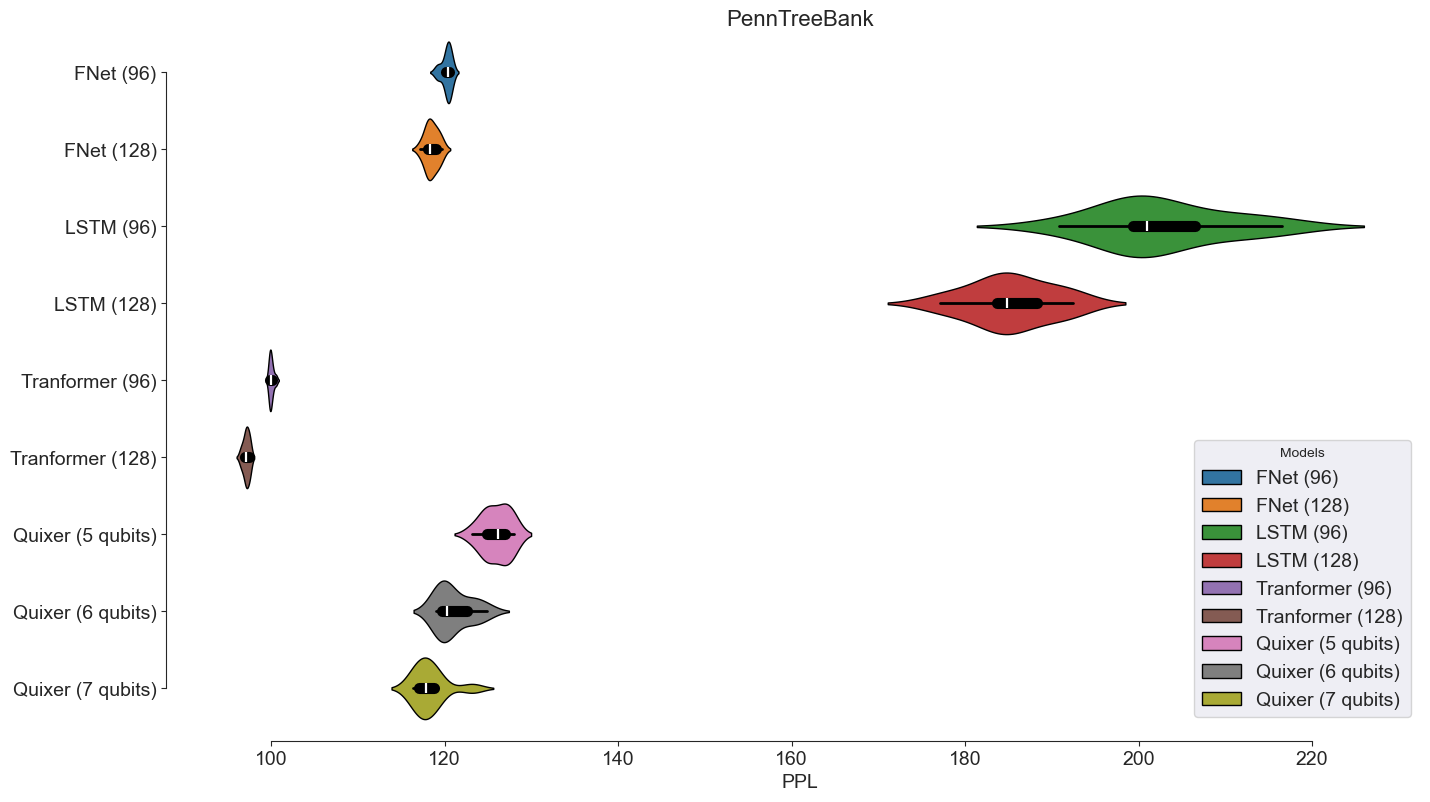

In [37]:
# plot a boxplot of the each column of the DataFrame
plt.figure(figsize=(16, 9))
with sns.axes_style("ticks"):
    sns.violinplot(data=df_pivot, orient='h', linewidth=1, legend=True, linecolor="k", inner_kws=dict(box_width=8, whis_width=2))
    sns.despine(offset=10, trim=True)
plt.grid(False)
plt.title(dataset_dir[:-1], fontsize=16)
#plt.ylabel('Models')
plt.xlabel('PPL', fontsize=14)
plt.legend(title='Models', loc='lower right', fontsize=14)
# set labels font size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig(dataset_dir + dataset_dir[:-1] + '_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

In [38]:
# Combine postselection probabilities in a single DataFrame with the model names as columns
postselection_prob = pd.concat([postselection_prob_5qbits, postselection_prob_6qbits, postselection_prob_7qbits], axis=1)
postselection_prob.columns = ['Quixer (5 qubits)', 'Quixer (6 qubits)', 'Quixer (7 qubits)']
# exclude all rows with values grater than 0.5
post_stats = postselection_prob.describe()

In [39]:
postselection_prob = postselection_prob[postselection_prob <= 0.5]

In [40]:
# create a latex table with the stats
latex_table = post_stats.to_latex(float_format="%.4f")
print(latex_table)

\begin{tabular}{lrrr}
\toprule
 & Quixer (5 qubits) & Quixer (6 qubits) & Quixer (7 qubits) \\
\midrule
count & 162645.0000 & 308240.0000 & 175693.0000 \\
mean & 0.0927 & 0.0735 & 0.0778 \\
std & 0.0467 & 0.0340 & 0.0372 \\
min & 0.0154 & 0.0154 & 0.0076 \\
25% & 0.0550 & 0.0498 & 0.0597 \\
50% & 0.1014 & 0.0707 & 0.0816 \\
75% & 0.1226 & 0.0963 & 0.0891 \\
max & 0.7467 & 0.5160 & 0.5724 \\
\bottomrule
\end{tabular}



/var/folders/m0/92gfbc6x10s7fdvbqfp73yqh0000gn/T/ipykernel_12104/4053513991.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


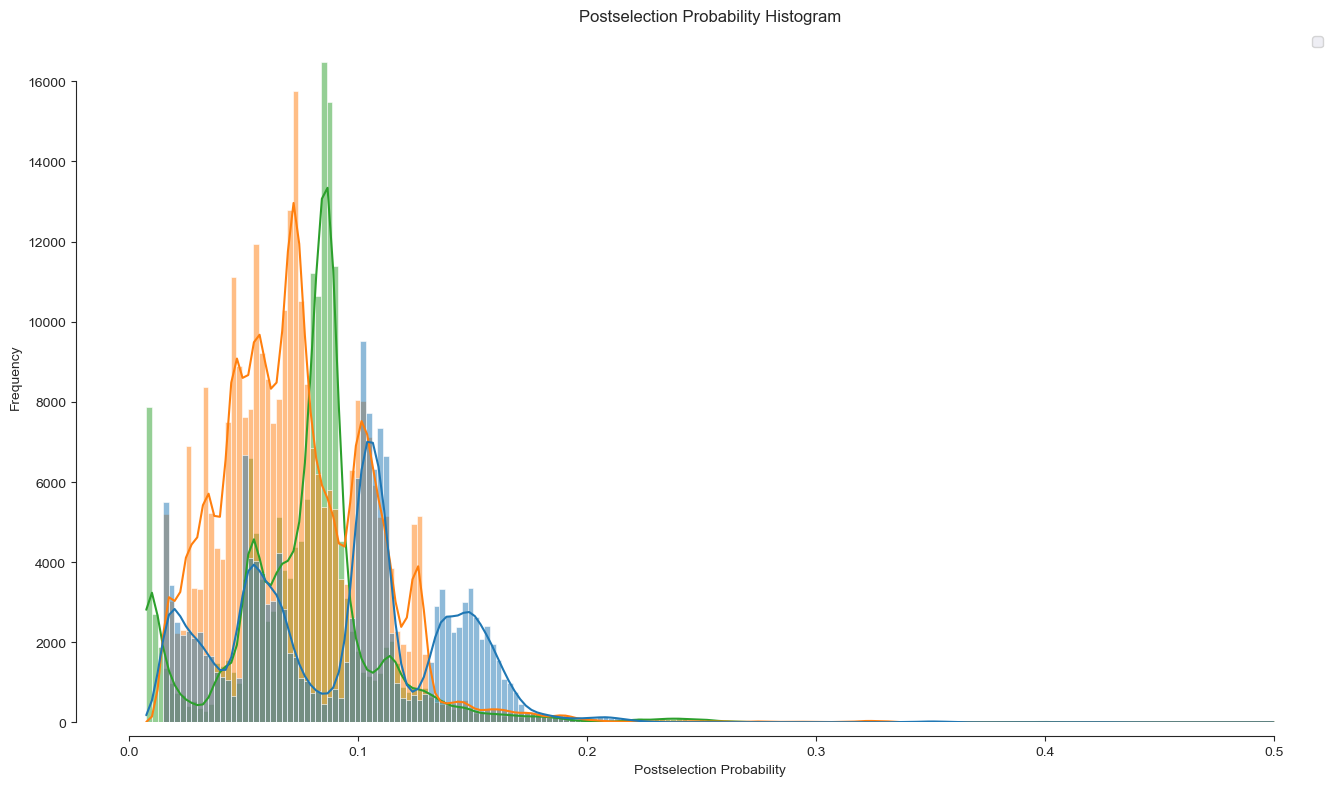

In [41]:
# plot the histogram of the postselection probabilities
plt.figure(figsize=(16, 9))
with sns.axes_style("ticks"):
    sns.histplot(postselection_prob, bins=200, kde=True, color='green', legend=False)
    sns.despine(offset=10, trim=True)
plt.grid(False)
plt.title('Postselection Probability Histogram')
plt.ylabel('Frequency')
plt.xlabel('Postselection Probability')
plt.legend(loc='upper right')
#plt.xlim(0, 0.03)
plt.savefig('PennTreeBank/trained_models_6qbits/postselection_prob_histogram_6qbits.png', dpi=300)

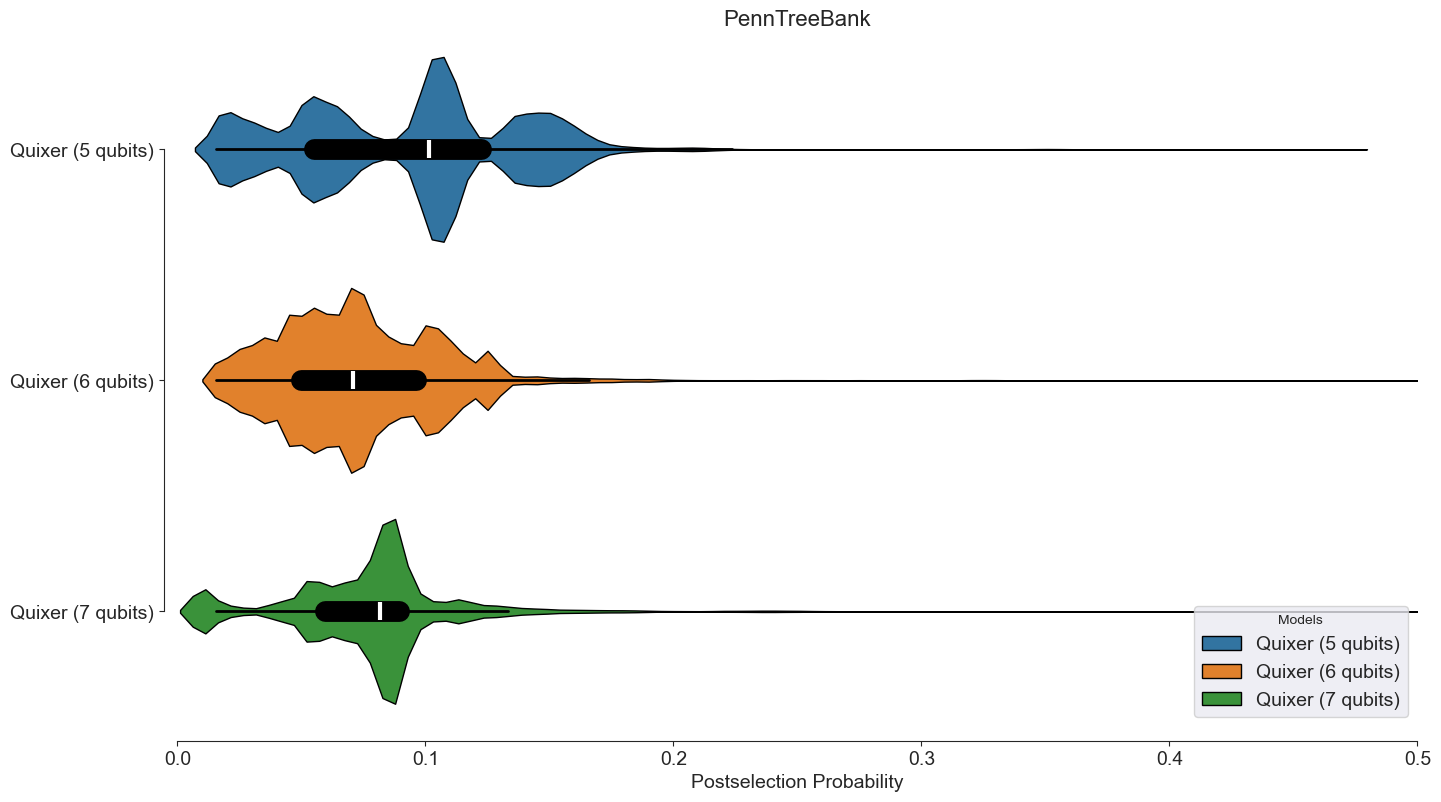

In [42]:
# plot the Half violin plot of the postselection probabilities
plt.figure(figsize=(16, 9))
with sns.axes_style("ticks"):
    sns.violinplot(data=postselection_prob, orient='h', linewidth=1, legend=True, linecolor="k", inner_kws=dict(box_width=15, whis_width=2))
    sns.despine(offset=10, trim=True)
plt.grid(False)
plt.title(dataset_dir[:-1], fontsize=16)
#plt.ylabel('Model', fontsize=14)
plt.xlabel('Postselection Probability', fontsize=14)
plt.legend(title='Models', loc='lower right', fontsize=14)
# set labels font size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# limit the x-axis to the range [0, 0.05]
plt.xlim(0, 0.5)
plt.savefig(dataset_dir + dataset_dir[:-1] + '_postselection_prob.png', dpi=300, bbox_inches='tight')